<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18461 entries, 0 to 18460
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            18461 non-null  object 
 1   Summary                   18460 non-null  object 
 2   Precip Type               18460 non-null  object 
 3   Temperature (C)           18460 non-null  float64
 4   Apparent Temperature (C)  18460 non-null  float64
 5   Humidity                  18460 non-null  float64
 6   Wind Speed (km/h)         18460 non-null  float64
 7   Wind Bearing (degrees)    18460 non-null  float64
 8   Visibility (km)           18460 non-null  float64
 9   Loud Cover                18460 non-null  float64
 10  Pressure (millibars)      18460 non-null  float64
 11  Daily Summary             18460 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.7+ MB
None
       Temperature (C)  Apparent Temperature (C)      Humidity  

<ipython-input-2-bea170aabd3e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Formatted Date'].dt.year
<ipython-input-2-bea170aabd3e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Formatted Date'].dt.month
<ipython-input-2-bea170aabd3e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

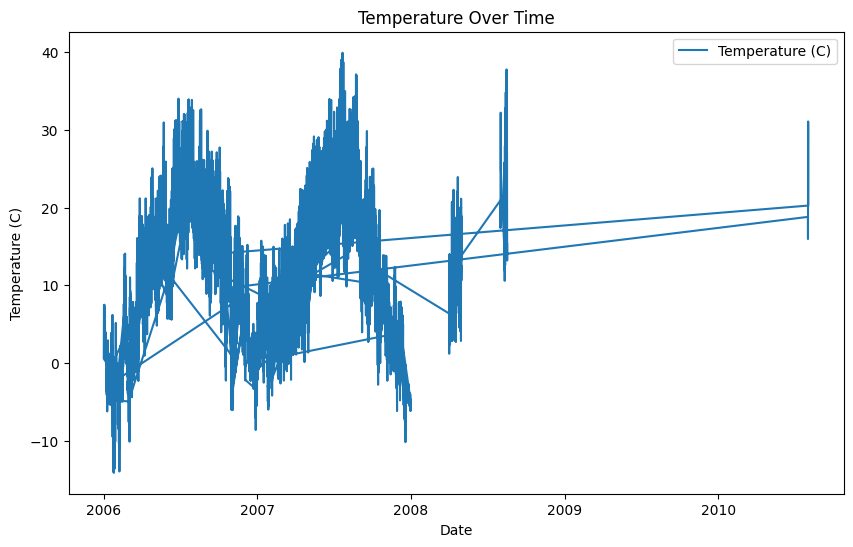

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('your_large_dataset.csv')

# Display basic information about the data
print(data.info())
print(data.describe())

# Convert 'Formatted Date' to datetime, handling errors and mixed formats
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], errors='coerce', utc=True)

# Check for rows with NaT (not a time) values after conversion
print(data[data['Formatted Date'].isna()])

# Drop rows with NaT values in 'Formatted Date'
data = data.dropna(subset=['Formatted Date'])

# Feature engineering: Extract useful components from the date
data['Year'] = data['Formatted Date'].dt.year
data['Month'] = data['Formatted Date'].dt.month
data['Day'] = data['Formatted Date'].dt.day
data['Hour'] = data['Formatted Date'].dt.hour

# Check for missing values
print(data.isnull().sum())

# Fill or drop other missing values as appropriate
data = data.dropna()

# Plotting temperature over time
plt.figure(figsize=(10, 6))
plt.plot(data['Formatted Date'], data['Temperature (C)'], label='Temperature (C)')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature Over Time')
plt.legend()
plt.show()


In [9]:
!pip install twilio

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the target variable
data['Heatwave'] = (data['Temperature (C)'] > 30).astype(int)

# Define features and target
features = data[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Month', 'Day', 'Hour']]
target = data['Heatwave']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[3570    0]
 [   0  122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3570
           1       1.00      1.00      1.00       122

    accuracy                           1.00      3692
   macro avg       1.00      1.00      1.00      3692
weighted avg       1.00      1.00      1.00      3692

